In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.api.types import is_numeric_dtype
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

# Load Data

In [2]:
white = pd.read_csv('winequality-white.csv',sep=';')
red = pd.read_csv('winequality-red.csv',sep=';')

# Data Cleaning

In [3]:
white['wine_type'] = 0
red['wine_type'] = 1

In [4]:
df = pd.concat([white,red])
df = df.reset_index()
df = df.drop(['index'],axis =1 )

### Based on quality rating...

Good wines: 6 and above <br>
Bad wines: 5 and below

In [5]:
df['rating'] = df['quality'].map({0:0,1:0,2:0,3:0,4:0,5:0,6:1,7:1,8:1,9:1,10:1});

In [6]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0,1


# EDA

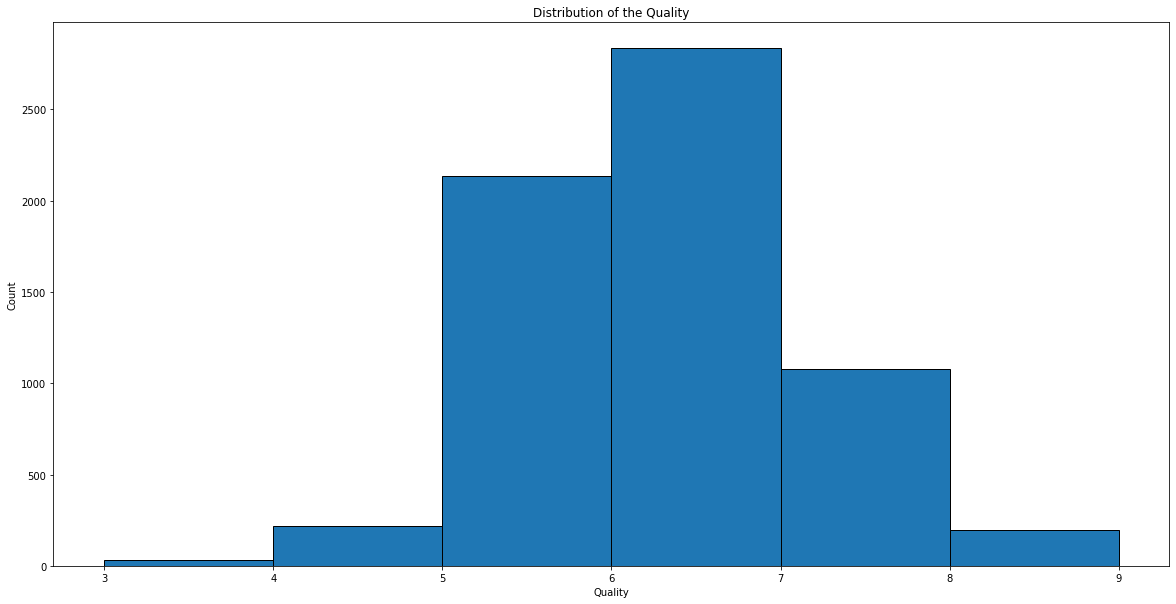

In [7]:
plt.figure(figsize = (20,10))
plt.hist(df['quality'],bins=6,alpha=1,ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality',horizontalalignment='center')
plt.ylabel('Count')
plt.show()

# Data Analysis

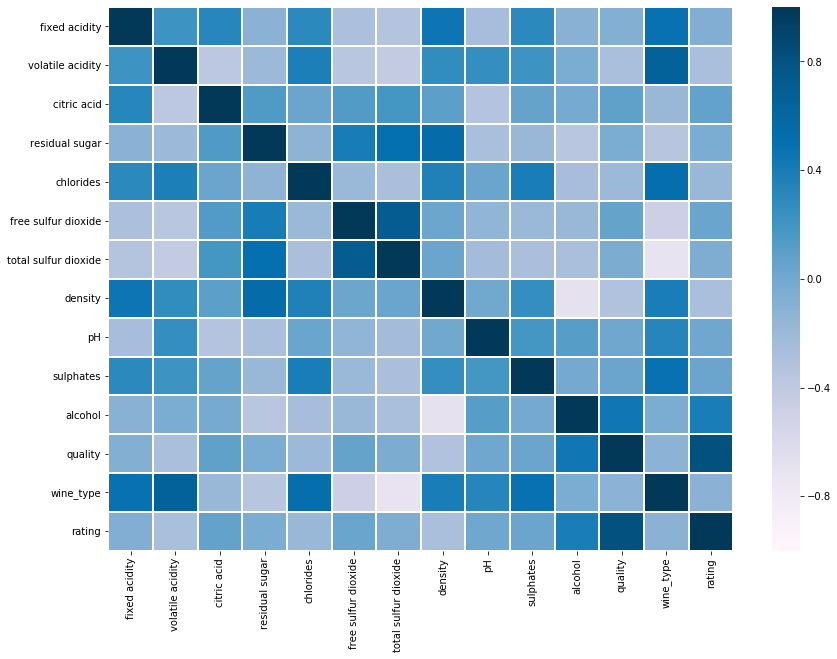

In [8]:
df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax=sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="PuBu", linewidths=1)

In [9]:
X = df[df.columns.difference(['rating'])]
y = df['rating']

In [10]:
X_withconst = sm.add_constant(X)
sm.OLS(y, X_withconst).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     1015.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:48:03   Log-Likelihood:                -870.41
No. Observations:                6497   AIC:                             1769.
Df Residuals:                    6483   BIC:                             1864.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -19.8417      5.351     -3.708      0.000     -30.332      -9.352
alcohol                  0.0373      0.007      5.402      0.000       0.024       0.051
chlorides                0.0213      0.126      0.168      0.866      -0.226       0.269
citric acid             -0.0733      0.030     -2.435      0.015      -0.132      -0.014
density                 17.9975      5.438      3.310      0.001       7.337      28.658
fixed acidity           -0.0084      0.006     -1.403      0.161      -0.020       0.003
free sulfur dioxide      0.0006      0.000      1.995      0.046    1.02e-05       0.001
pH                      -0.0217      0.034     -0.633      0.526      -0.089       0.046
quality                  0.4269      0.005     90.983      0.000       0.418       0.436
residual sugar          -0.0046      0.002     -2.013      0.044      -0.009      -0.000
sulphates                0.0367      0.029      1.264      0.206      -0.020       0.094
total sulfur dioxide    -0.0006      0.000     -4.503      0.000      -0.001      -0.000
volatile acidity        -0.2421      0.032     -7.680      0.000      -0.304      -0.180
wine_type               -0.0660      0.022     -3.070      0.002      -0.108      -0.024
==============================================================================
Omnibus:                     9906.197   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              441.001
Skew:                          -0.121   Prob(JB):                     1.73e-96
Kurtosis:                       1.747   Cond. No.                     2.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X = df[df.columns.difference(['free sulfur dioxide','total sulfur dioxide','sulphates','pH','wine_type','fixed acidity','density','citric acid','chlorides','quality','rating'])]
y = df['rating']

In [12]:
ans = pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])], 
              index= X.columns)

In [13]:
ans.sort_values(ascending = False).apply(lambda x: '%.5f' % x)

alcohol             6.31269
volatile acidity    4.93063
residual sugar      2.09599
dtype: object

In [14]:
X_withconst = sm.add_constant(X)
linear_reg = sm.OLS(y, X_withconst).fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     622.3
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:48:03   Log-Likelihood:                -3655.9
No. Observations:                6497   AIC:                             7320.
Df Residuals:                    6493   BIC:                             7347.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9071      0.056    -16.254      0.000      -1.017      -0.798
alcohol              0.1658      0.005     34.758      0.000       0.156       0.175
residual sugar       0.0069      0.001      5.676      0.000       0.005       0.009
volatile acidity    -0.6974      0.033    -21.209      0.000      -0.762      -0.633
==============================================================================
Omnibus:                     1769.895   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.219
Skew:                          -0.324   Prob(JB):                     9.17e-87
Kurtosis:                       1.978   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After filtering out how our features relate to each other, 

we concluded that there are only 3 features we should focus our efforts on: <br>
Alcohol content <br>
Volatile Acidity <br>
Level of residual sugar <br>

# Result 

In [15]:
wine_white = df.loc[df['wine_type'] > 0]
wine_red = df.loc[df['wine_type'] < 1]

In [16]:
wine_red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,0,1


### Alcohol Content

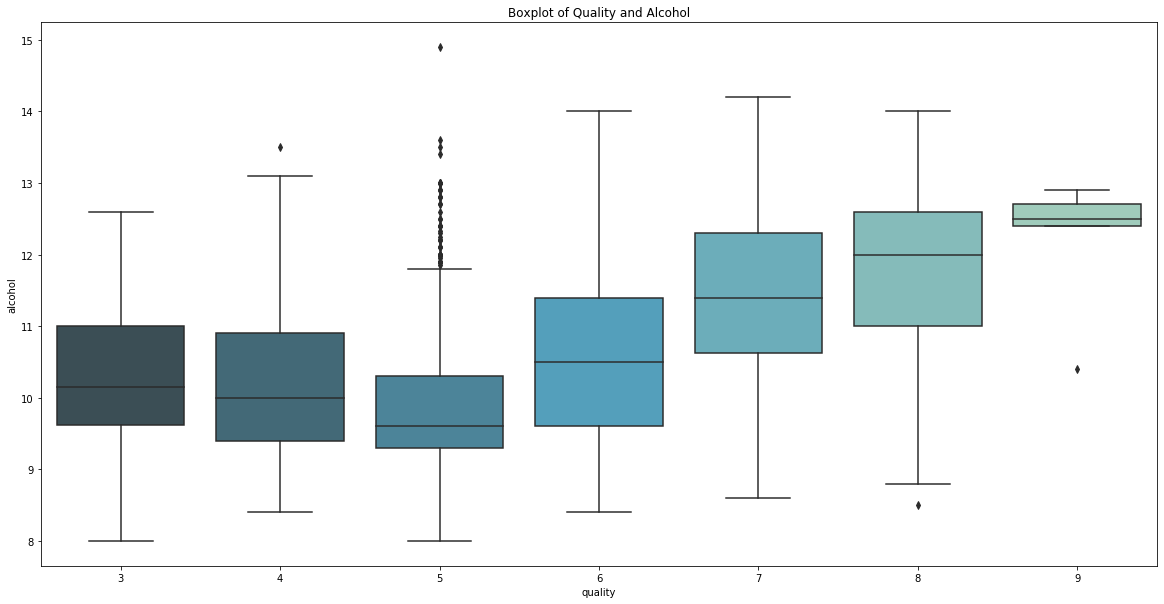

In [17]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x='quality',y='alcohol',data=df,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

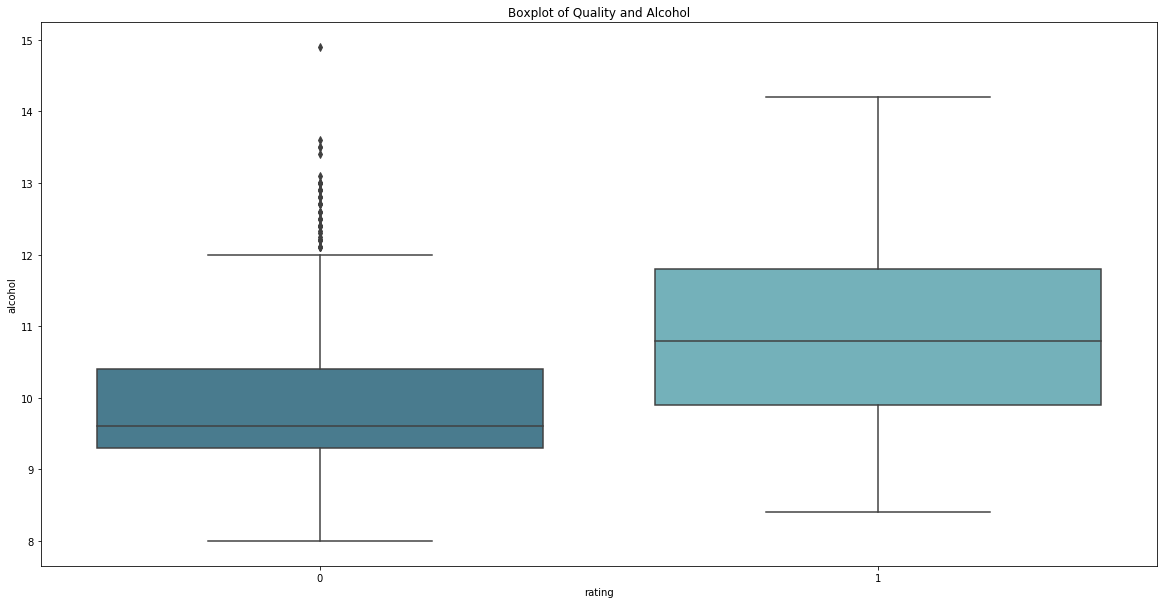

In [18]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x='rating',y='alcohol',data=df,palette='GnBu_d')
plt.title("Boxplot of Quality and Alcohol")
plt.show()

### Conclusion: 
Good wines have higher alcohol content

### Volatile Acidity

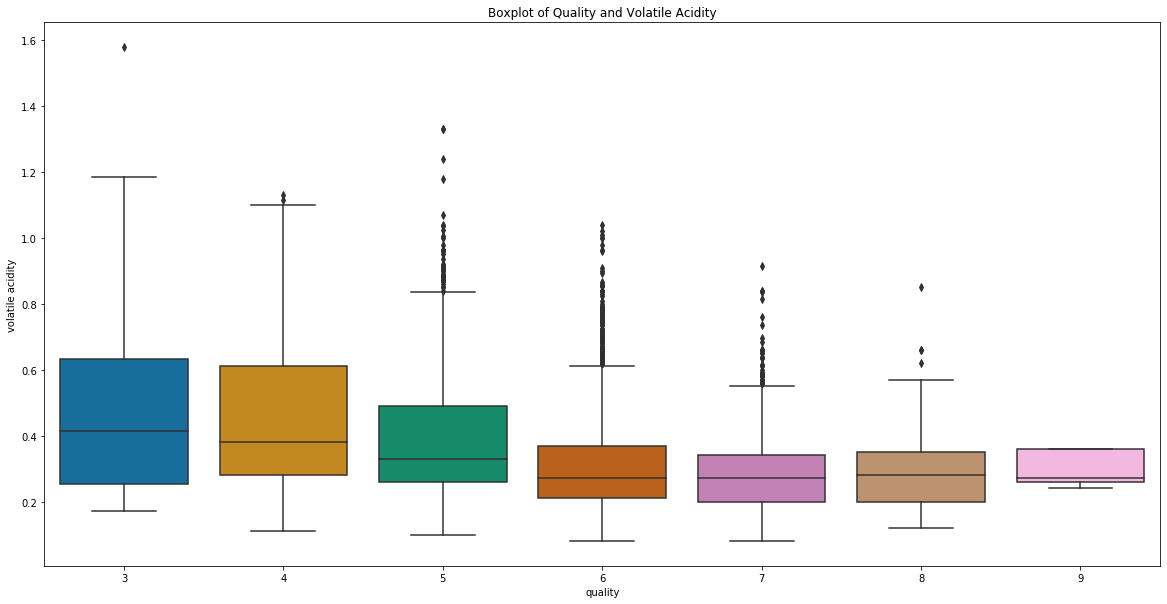

In [19]:
plt.figure(figsize = (20,10))
sns.boxplot(x="quality",y="volatile acidity",data=df,palette="colorblind")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

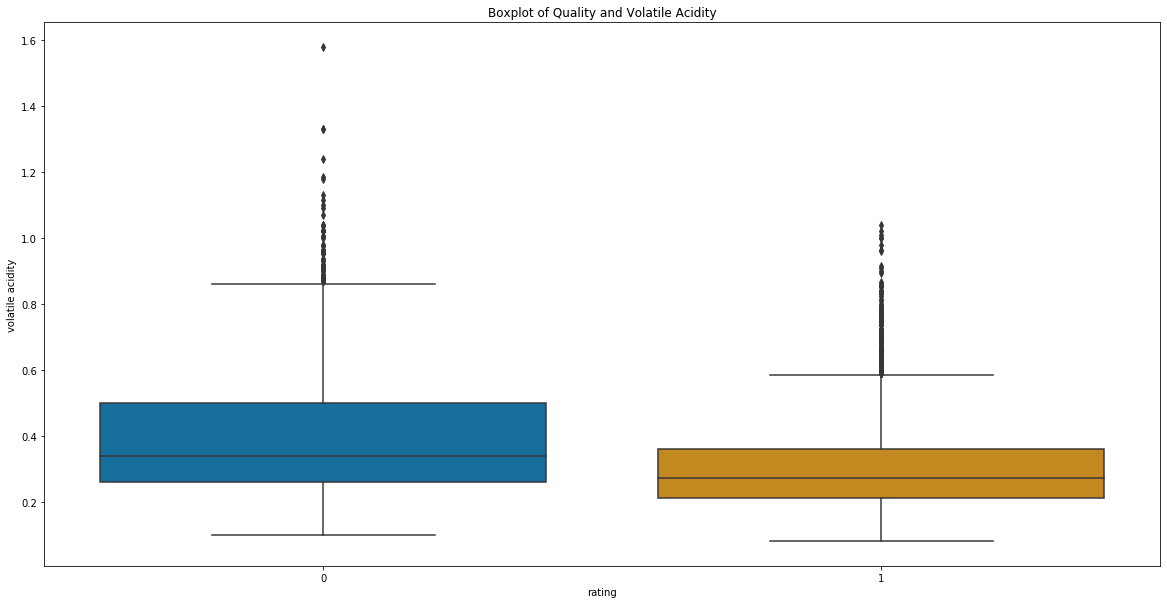

In [20]:
plt.figure(figsize = (20,10))
sns.boxplot(x="rating",y="volatile acidity",data=df,palette="colorblind")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

### Conclusion: 
Good wines have lower volatile acidity


### Residual Sugar

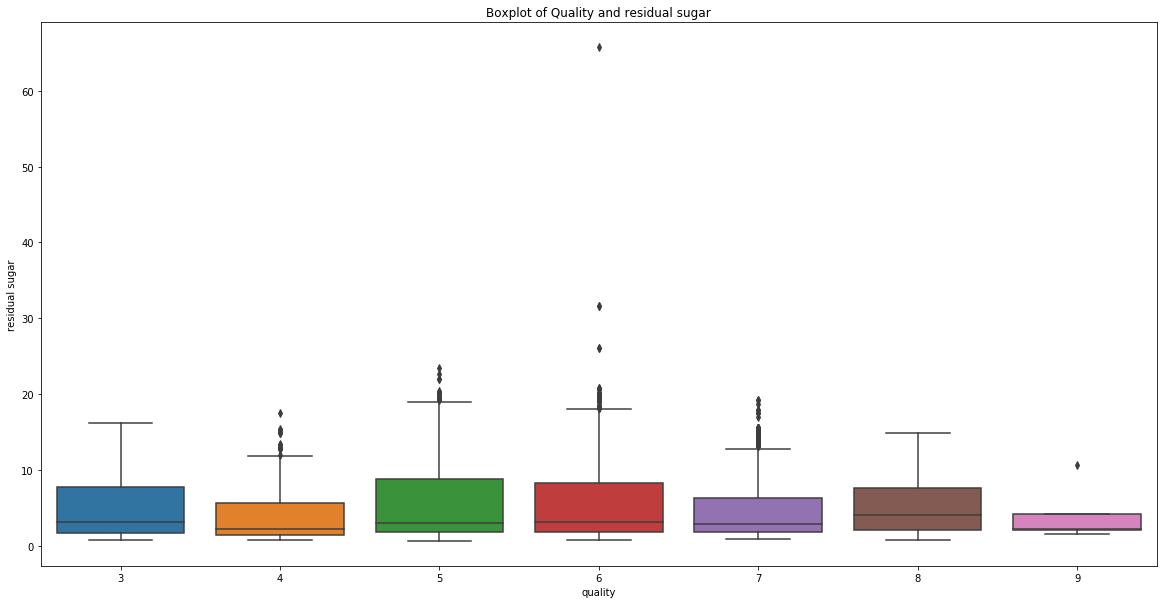

In [21]:
plt.figure(figsize = (20,10))
sns.boxplot(x="quality",y="residual sugar",data=df)
plt.title("Boxplot of Quality and residual sugar")
plt.show()

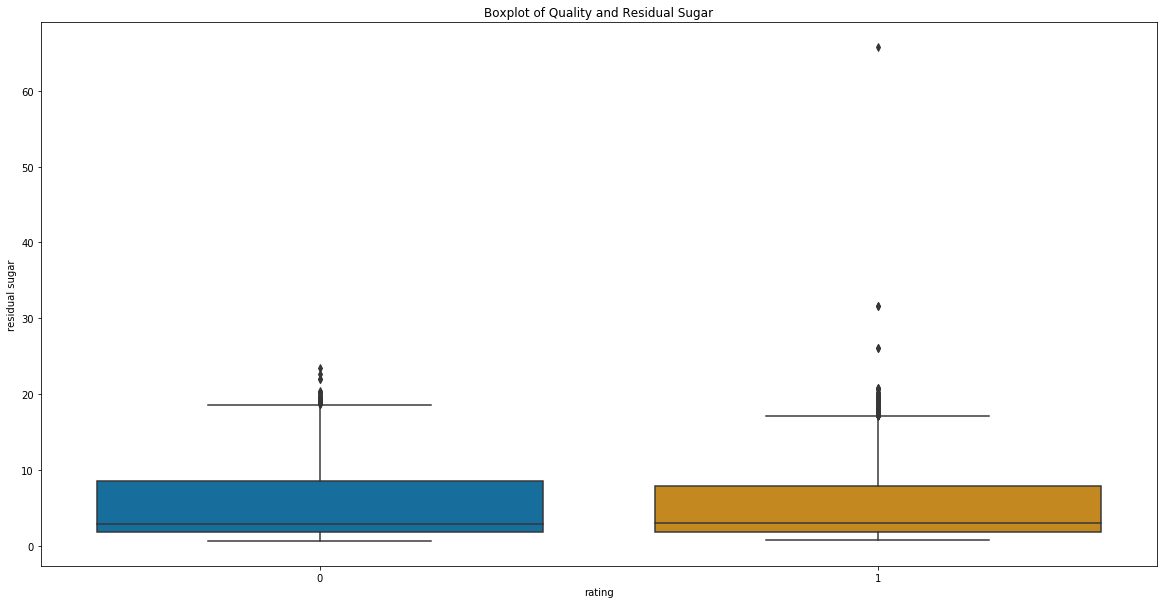

In [22]:
plt.figure(figsize = (20,10))
sns.boxplot(x="rating",y="residual sugar",data=df,palette="colorblind")
plt.title("Boxplot of Quality and Residual Sugar")
plt.show()

### Conclusion: 
Good wines have slightly higher residual sugar

# Red vs. White?

    Although our analysis takes into account on the type of wine (i.e. red or white), this feature came up as inconsequential in predicting the overall rating of the wine itself.

# Alcohol Content

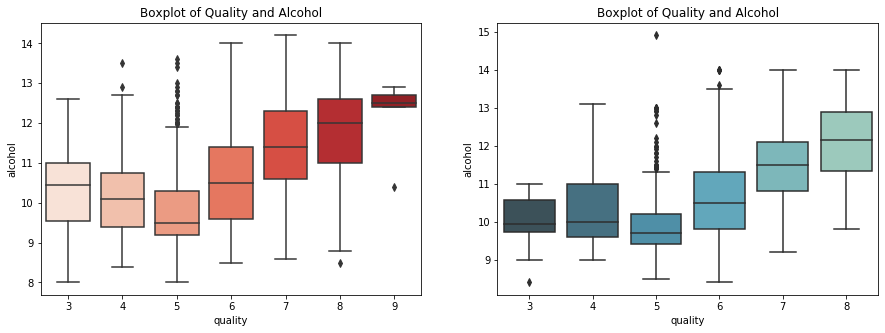

In [23]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.boxplot(x='quality',y='alcohol',data=wine_red,palette='Reds',ax=axs[0]).set_title("Boxplot of Quality and Alcohol")
sns.boxplot(x='quality',y='alcohol',data=wine_white,palette='GnBu_d',ax=axs[1]).set_title("Boxplot of Quality and Alcohol")
plt.show()


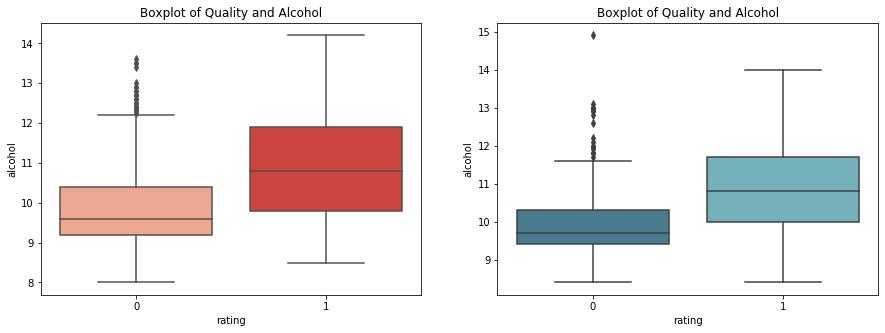

In [24]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.boxplot(x='rating',y='alcohol',data=wine_red, palette='Reds',ax=axs[0]).set_title("Boxplot of Quality and Alcohol")
sns.boxplot(x='rating',y='alcohol',data=wine_white, palette='GnBu_d',ax=axs[1]).set_title("Boxplot of Quality and Alcohol")
plt.show()

# Volatile Acidity

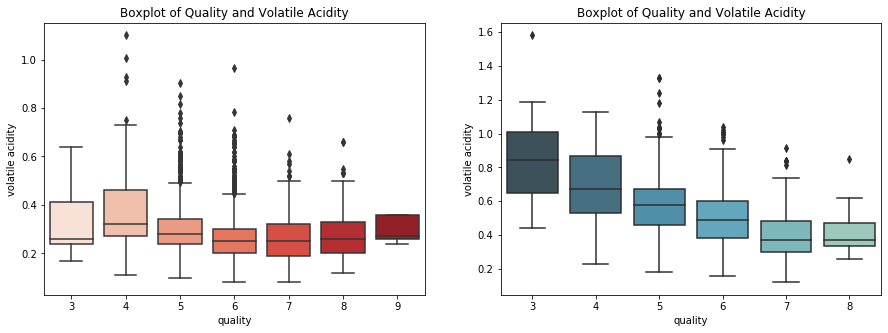

In [25]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.boxplot(x='quality',y='volatile acidity',data=wine_red, palette='Reds',ax=axs[0]).set_title("Boxplot of Quality and Volatile Acidity")
sns.boxplot(x='quality',y='volatile acidity',data=wine_white, palette='GnBu_d',ax=axs[1]).set_title("Boxplot of Quality and Volatile Acidity")
plt.show()

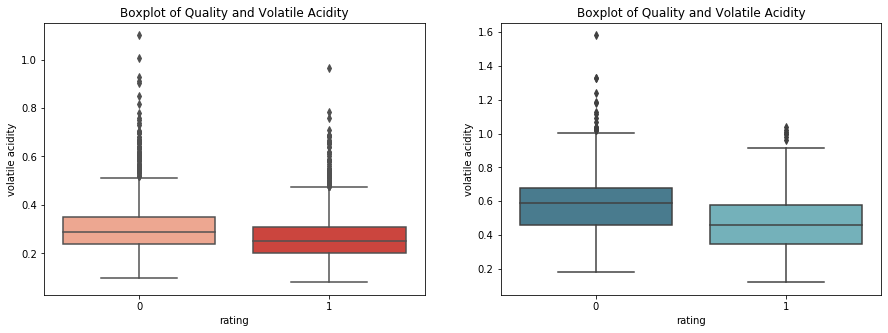

In [26]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.boxplot(x='rating',y='volatile acidity',data=wine_red, palette='Reds',ax=axs[0]).set_title("Boxplot of Quality and Volatile Acidity")
sns.boxplot(x='rating',y='volatile acidity',data=wine_white, palette='GnBu_d',ax=axs[1]).set_title("Boxplot of Quality and Volatile Acidity")
plt.show()

# Residual Sugar

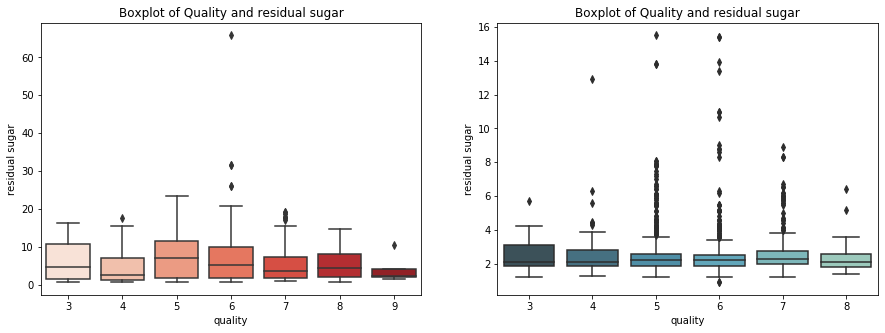

In [27]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.boxplot(x='quality',y='residual sugar',data=wine_red, palette='Reds',ax=axs[0]).set_title("Boxplot of Quality and residual sugar")
sns.boxplot(x='quality',y='residual sugar',data=wine_white, palette='GnBu_d',ax=axs[1]).set_title("Boxplot of Quality and residual sugar")
plt.show()

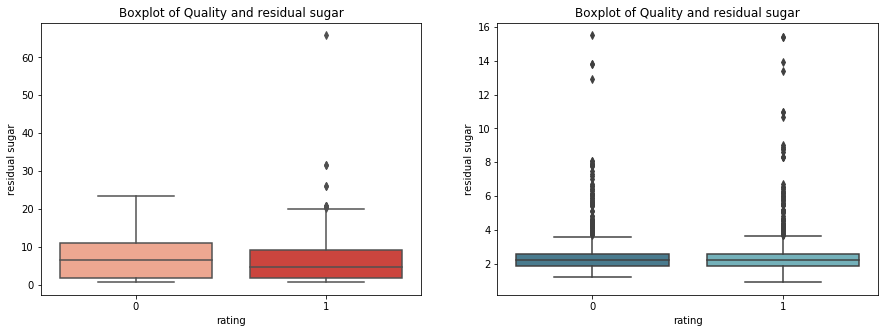

In [28]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
sns.boxplot(x='rating',y='residual sugar',data=wine_red, palette='Reds',ax=axs[0]).set_title("Boxplot of Quality and residual sugar")
sns.boxplot(x='rating',y='residual sugar',data=wine_white, palette='GnBu_d',ax=axs[1]).set_title("Boxplot of Quality and residual sugar")
plt.show()

# Modeling 

In [29]:
X = df[df.columns.difference(['rating'])]
y = df['rating']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2 , shuffle = True)

In [31]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
pca = PCA(n_components=6).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
expl_var = pca.explained_variance_ratio_

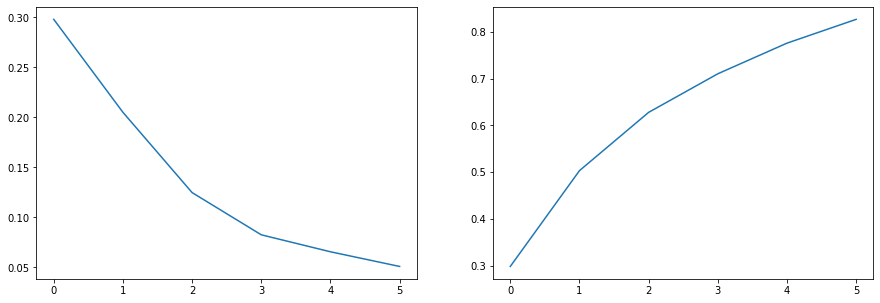

In [33]:
fig, axs = plt.subplots(ncols=2,figsize=(15, 5))
axs[0].plot(expl_var)
axs[1].plot(np.cumsum(expl_var))
plt.show()

In [34]:
log = LogisticRegression()
log.fit(X_train_pca, y_train)
y_pred = log.predict(X_test_pca)
log.score(X_test_pca, y_test)

0.9569230769230769

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       477
           1       0.96      0.97      0.97       823

    accuracy                           0.96      1300
   macro avg       0.96      0.95      0.95      1300
weighted avg       0.96      0.96      0.96      1300



### Through Logistic Regression...

The test accuracy is: 0.9607692307692308 . <br>
This means that with just the three features of focus, we are able to successfully predict whether a wine would be rated as good or not close to 96% of the time!


# Recommendations: 

Should we choose to focus our marketing efforts on promoting good wines, theses are the wine features we should look for: <br>
Higher alcohol content <br>
Lower volatile acidity <br>
Higher residual sugar content  
